**By: Ahmed Abdulghany**

    Supervised Learning:
    - Regression (predicting values) (Linear Regression, Decision Trees, and Random Forests)
    - Classification (predicting classes)

In [1]:
from sklearn.datasets import fetch_openml

The function `fetch_openml()` is used to download datasets from OpenML.

🔸 By default:

    It returns features (inputs) as a Pandas DataFrame.

    It returns labels (targets) as a Pandas Series.

    Unless the dataset is sparse

The MNIST dataset contains images (handwritten digits).

Images are best handled as NumPy arrays (not DataFrames).

✅ as_frame=True (default) → DataFrame & Series (good for tabular data).

✅ as_frame=False → NumPy arrays (better for images like MNIST).

✅ as_frame=False → returns both features and labels as NumPy arrays.

✅ Easier to:

    Display images.

    Process them.

    Feed them into machine learning models.

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

"DESCR" A description of the dataset

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels

In [8]:
28 * 28

784

"data" The input data, usually as a 2D NumPy array

In [9]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

"target" The labels, usually as a 1D NumPy array

In [10]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [11]:
import matplotlib.pyplot as plt

In [12]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

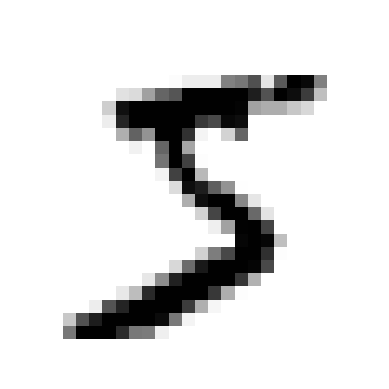

In [13]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [14]:
y[0]

'5'

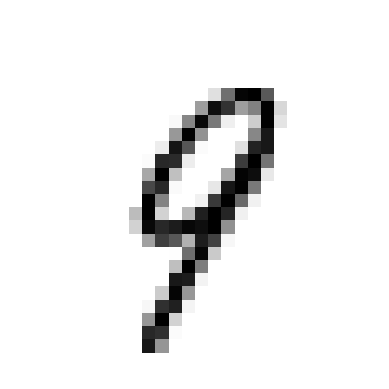

In [15]:
some_digit2 = X[22]
plot_digit(some_digit2)
plt.show()

In [16]:
y[22]

'9'

**Training set (the first 60,000 images) and a Test set (the last 10,000 images)**

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

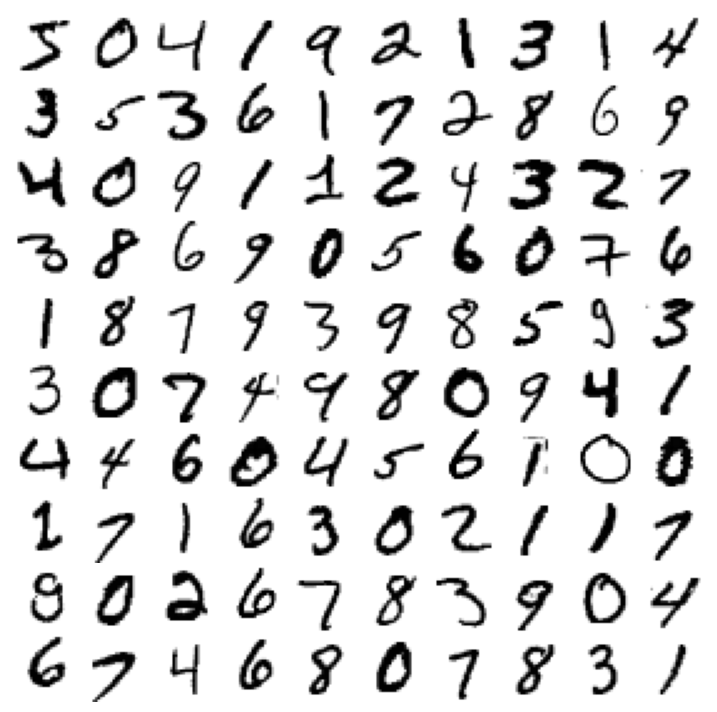

In [18]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

# Training a Binary Classifier

**Deciding between 2 groups**

Is this digit the #5 or not the #5?

In [19]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

**choose a classifier and train it.**

A great first choice is the SGDClassifier from Scikit-learn.

    SGD stands for Stochastic Gradient Descent.
    It is very good at training on large datasets
        because:
- It updates the model one training example at a time (instead of the whole dataset at once).
- This also makes it great for online learning (learning continuously from new data).

In [20]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [21]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

## Measuring Accuracy Using Cross-Validation

In [22]:
>>> from sklearn.model_selection import cross_val_score
>>> cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

✅ cross_val_score → Function from Scikit-learn that does cross-validation.

✅ sgd_clf → The classifier you trained (SGDClassifier).

✅ X_train → The training images.

✅ y_train_5 → The target labels → is it a 5 (True/False)?

✅ cv=3 → "Cross-validation with 3 folds":

These are the accuracy scores for the 3 runs:

    First run: 95.03% accuracy

    Second run: 96.03% accuracy

    Third run: 96.04% accuracy

### Dummy Classifier

In [25]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

DummyClassifier()

In [26]:
print(any(dummy_clf.predict(X_train))) 

False


In [27]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

DummyClassifier is a **"fake" classifier** — it does not learn anything!

It just uses simple rules like:

    Always guess the most common class (default behavior).

    Or random guessing (if you change the strategy).

It will always predict the most common class.

In this case → the most common is False (not 5).
So:
-   **It always predicts False** → even for images of the number 5.

Why accuracy looks high:

Since 90% of the images are "not 5" →

just predicting "False" gives 90% accuracy → but the model is useless!

     ✅ That’s why accuracy alone can trick you with imbalanced data.
     so
     don’t trust accuracy alone → check precision, recall, and confusion matrix.

### IMPLEMENTING CROSS-VALIDATION

Sometimes you want more control over how cross-validation is done

    That's how to do a manual cross-validation

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [29]:
skfolds = StratifiedKFold(n_splits=3) # add shuffle=True if the dataset is not already shuffled

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) # We make a fresh copy of the classifier, So that each fold starts with a clean model.
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold) # Count how many predictions were correct
    print(n_correct / len(y_pred)) # calculate accuracy for this fold

0.95035
0.96035
0.9604


📌 What is **StratifiedKFold**?

- It splits the dataset into K folds → here n_splits=3.

Stratified means:
    
    Each fold has the same % of "5" and "not 5" as the full dataset.
    This is important when data is imbalanced → like here (~10% "5").

## Confusion Matrices 

**A Confusion Matrix helps you understand how well your classifier performs.**

It counts how many times the model:

- Correctly predicted each class

- Incorrectly predicted each class as some other class

**It shows you where the model is confused**

In [30]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Like the cross_val_score() function, cross_val_predict() performs k-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold.

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

Row 1 → Actual "Not 5":

    53,892 → correctly predicted as "Not 5" → ✅ True Negatives (TN)

    687 → wrongly predicted as "5" → ❌ False Positives (FP) → Type I error

Row 2 → Actual "5":

    1,891 → wrongly predicted as "Not 5" → ❌ False Negatives (FN) → Type II error

    3,530 → correctly predicted as "5" → ✅ True Positives (TP)

In [33]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

Only True Positives and True Negatives → no mistakes.

Main diagonal has values

**Why accuracy alone is not enough?** 
    
    especially for imbalanced data.

SO we will evaluate a classifier using:
    
- Precision
    
- Recall

- F1-score

## Precision and Recall

**Precision = TP / (TP + FP)**

Meaning:
Of all the images predicted as "5", how many were actually "5"?

✅ High precision → when model says "5", it is usually correct.

❌ Low precision → model often says "5" but is wrong.

If a model only predicts "5" once, and it happens to be correct → it gets 100% precision!

    But this model is useless — it misses all the other "5"s!

**Recall = TP / (TP + FN)**

Meaning:
Of all the real "5"s, how many did the model actually detect?

✅ High recall → finds most of the "5"s.

❌ Low recall → misses many "5"s.

**Example confusion matrix:**

[[53892,  687],   # Not 5 (TN, FP)

 [ 1891, 3530]]   # 5 (FN, TP)


In [34]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 3530 / (687 + 3530)

0.8370879772350012

In [35]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

**Interpretation:**

    When model predicts "5" → it is correct 83.7% of the time (precision).
    
    But it only detects 65.1% of the real "5"s (recall).

    So it's not as "perfect" as accuracy made it look!

**F1 = 2 * (precision * recall) / (precision + recall)**

This is the harmonic mean of precision and recall.

It gives low score if either precision or recall is low → encourages **balanced model**.

Why F1-score?

    - Combines precision & recall → one number to compare models.

    - Only high if both precision and recall are good.

In [36]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

🟢 Real-life examples:

- High precision, low recall → Safe video classifier (don’t want bad videos to get through).
- High recall, low precision → Shoplifter detection (ok to have false alarms, just catch all shoplifters).

⚠️ Trade-off:

You cannot maximize both precision & recall at the same time:
- Increase precision → recall usually goes down
- Increase recall → precision usually goes down

## Precision/Recall Trade-off

For each input (image), it computes a score → called the decision function.

- If score > threshold → predict positive (ex: "5").
- If score ≤ threshold → predict negative (ex: "not 5").

**What happens if you move the threshold?**

Raise threshold:

- Fewer positive predictions → higher precision ✅
- But you miss more real "5"s → lower recall ❌

Lower threshold:

- More positive predictions → higher recall ✅
- But more wrong "5"s → lower precision ❌

Scikit-Learn does not let you set the threshold directly, but you can call its **`decision_function()`** method

In [37]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [38]:
threshold = 0

In [39]:
y_some_digit_pred = (y_scores > threshold)

In [40]:
y_some_digit_pred

array([ True])

In [41]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

**How to choose the best threshold?**

Use **`cross_val_predict()`** to get scores for all training data:

In [42]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

Then compute precision/recall for all possible thresholds using **`precision_recall_curve()`**

The function computes precision and recall for many thresholds.

Then it adds one last point:

    Precision = 0

    Recall = 1

In [43]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

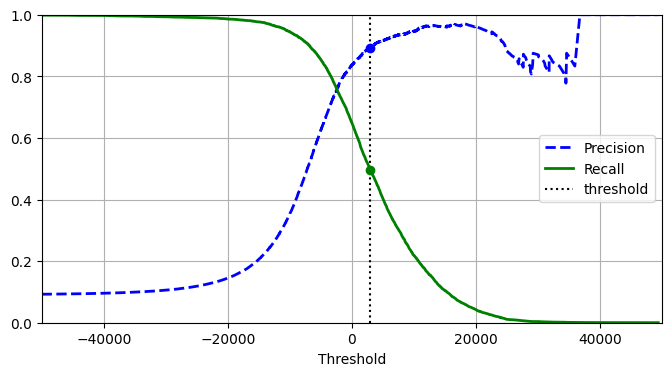

In [44]:
plt.figure(figsize=(8, 4)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

✅ **Recall curve:**

    When you increase the threshold → recall can only decrease.

    Because you're making fewer positive predictions → you will miss more real positives.

    So the recall curve looks smooth and always decreasing.

⚠️ **Precision curve:**

    When you increase the threshold, precision usually goes up...

    BUT sometimes it can go down!

**Why can precision drop?**

Precision = TP / (TP + FP).

If raising the threshold removes a true positive (TP) → precision drops.

Example (from Figure 3-4):

    Before: 4 TP and 1 FP → precision = 4/5 = 80%.

    After raising threshold → 3 TP and 1 FP → precision = 3/4 = 75% → precision drops.

**How to choose a good trade-off between precision and recall?**

Plot precision vs recall (not vs threshold):

You can also plot precision directly against recall:

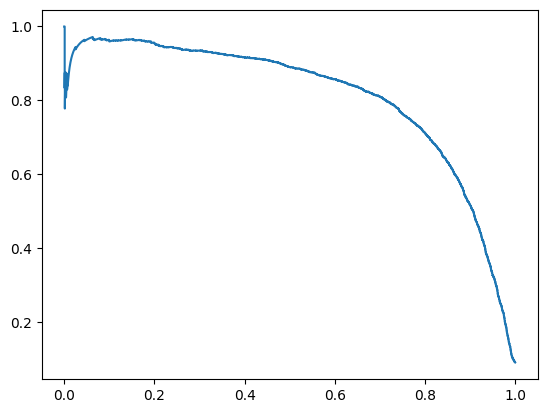

In [45]:
plt.plot(recalls, precisions)

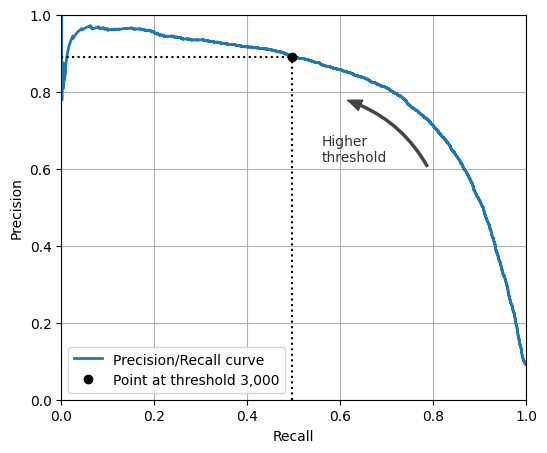

In [46]:
import matplotlib.patches as patches

plt.figure(figsize=(6, 5))

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

**To help you choose the best threshold**

if you want at least 90% precision

In [47]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [48]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [49]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [50]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

So The key point:

- It’s easy to get high precision → just set a high threshold.
- But... recall will go down!

So → a classifier with 90% precision but only 43% recall may not be good enough 🚩.

## The ROC Curve 

🎯 What is the ROC Curve?
    
    used with binary classifiers

X-axis → False Positive Rate (FPR)

Y-axis → True Positive Rate (TPR), a.k.a Recall

    FPR = FP / (FP + TN)

    TPR = TP / (TP + FN)

The ROC curve shows a trade-off between:

    Recall (TPR) → how many true positives you catch

    False Positive Rate (FPR) → how many false positives you produce

Why use the ROC Curve?

- It shows how well your classifier separates the two classes at all thresholds.
- The closer the curve is to the top-left corner, the better.
- The diagonal line is a random classifier.
- The area under the curve (AUC) is a powerful single-number summary: **higher = better!**

In [51]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

- y_train_5: true labels (0 or 1).

- y_scores: prediction scores (probabilities or decision function).

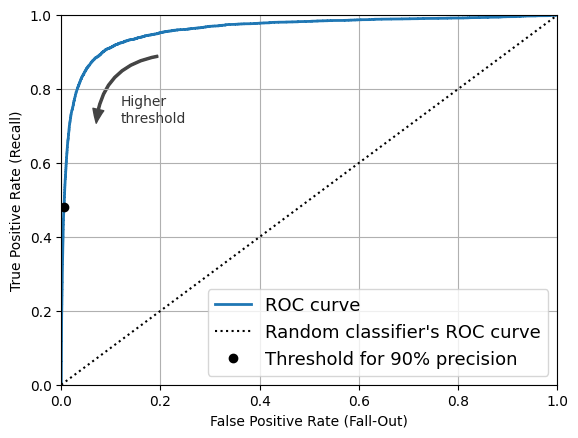

In [52]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

- If you want higher Recall (TPR) → you have to lower the threshold.
- But lowering the threshold → will usually increase FPR.
- That’s the trade-off → **higher TPR usually comes with higher FPR**.

In [53]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

How to compare classifiers? → Use AUC!

AUC = Area Under the Curve.

    Perfect classifier → ROC AUC = 1.0

    Random classifier → ROC AUC = 0.5

- With SGDClassifier → you used **`.decision_function()`** → gives "confidence" scores.
- BUT RandomForestClassifier does NOT have .decision_function() → instead it has: **`.predict_proba()`** because it returns probabilities per class → which you can use as "score".

In [54]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [55]:
y_probas_forest = cross_val_predict(
    forest_clf, 
    X_train, 
    y_train_5, 
    cv=3, 
    method="predict_proba"
)

In [56]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

Each row → 2 probabilities → must sum to 1 
    
    [prob_class_0, prob_class_1]

Interpretation:

    First image → 89% probability positive (class 1) → likely a '5'.

    Second image → 99% probability negative (class 0) → likely not a '5'.

**comparing the RandomForestClassifier and SGDClassifier by plotting their Precision-Recall (PR) curves.**

In [57]:
y_scores_forest = y_probas_forest[:, 1]

precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, 
    y_scores_forest
)

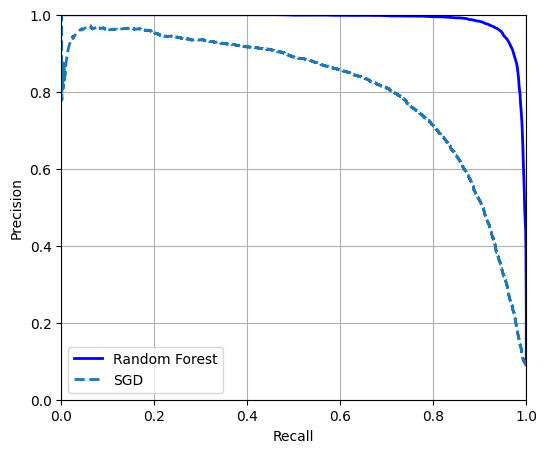

In [58]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

The RandomForestClassifier PR curve is better than the SGDClassifier PR curve:
- Closer to top-right
- Larger area under the PR curve (PR AUC)

**Metrics for RandomForest**

In [59]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%

**F1-score**

In [60]:
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

**ROC AUC**

In [61]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

**Precision**

In [62]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

**Recall**

In [63]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

In general How to Know 
**Is your dataset balanced or imbalanced?**

- If the positive and negative classes are about equal → **Balanced**.
- If one class is much rarer (ex: 1% fraud cases, 99% normal) → **Imbalanced**.

so
**My opinion:**

- 1- Always check class balance first — it affects everything: choice of model, metrics, even cross-validation!
- 2- For modern projects, imbalanced data is more common than balanced (fraud, medical, search, ads, etc).

**Why it matters**

    In imbalanced data, accuracy can lie!
    (ex: 95% accuracy if model always predicts class 0)

    You should focus on precision, recall, F1, PR AUC instead.

**Should you optimize for ROC AUC or Precision-Recall AUC?**
- Balanced dataset → ROC AUC is fine.
- Imbalanced dataset → Precision-Recall AUC is better.

**Do you need to present a single threshold or allow for threshold tuning?**

- If your business decision depends on a fixed threshold (ex: accept/reject a loan) → Single threshold.
- If you want to adjust threshold over time or across contexts → Allow threshold tuning.

Example: In fraud detection, you may tune threshold to catch more fraud at certain times (e.g. holiday season).

# Multiclass Classification

Multiclass Classifiers (also called multinomial classifiers) can distinguish between **more than two classes** such as LogisticRegression,
RandomForestClassifier, and GaussianNB).

**Binary vs. Multiclass**

    Binary classifier → Distinguishes between 2 classes (example: spam or not spam).

    Multiclass classifier → Distinguishes between more than 2 classes (example: classifying handwritten digits 0-9).

1. One-vs-Rest (OvR) or One-vs-All (OvA)

How it works:

    You train 1 classifier per class.

    For digits 0-9 → 10 classifiers:

        A 0-detector

        A 1-detector

        ...

        A 9-detector

Prediction:

    For a new image, run it through all classifiers.

    Choose the class with the highest score.

Good for Algorithms that scale well (can handle large training sets well) such as (Logistic Regression, Random Forest).

2. One-vs-One (OvO)

How it works:

    You train 1 classifier per pair of classes.

    For N classes, you need:
    N × (N - 1) / 2 classifiers.

Example: for MNIST digits 0-9 (10 classes):
10 × (10 - 1) / 2 = 45 classifiers.

Prediction:

    The new image is tested on all classifiers.

    Each classifier casts one vote.

    The class with the most votes wins.


Good choice when algorithm does not scale well (scale poorly) with large datasets (e.g., SVM).

**Scikit-Learn Auto-Detects Multiclass** to run OvR or OvO

In [64]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  #Train on first 2,000 images only

SVC(random_state=42)

How Prediction Works?

In [65]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

- This runs the digit through all 45 classifiers.

- Each classifier does a "duel" between 2 classes.

- The class that wins the most duels is predicted.

**`decision_function()`**

In [66]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

**`decision_function()`** This method gives scores for each class

- You get 10 scores → one per class (0 to 9).

- The scores = number of duels won, with a tiny tweak (±0.33) to break ties.

**Find the Predicted Class**

In [67]:
class_id = some_digit_scores.argmax()
print(class_id)

5


so Class 5 has the highest score (9.3) → **predicted**.

**classes_ Attribute**
- When you train a classifier in Scikit-Learn, it stores the **list of all class labels** in **classes_**

- **classes_** is an array of the unique target labels it saw during training, sorted by value.

(for MNIST **digits 0-9**)

In [68]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [69]:
svm_clf.classes_[class_id]

'5'

If you want to **force** Scikit-Learn to use a specific multiclass strategy:
- One-vs-One (OvO)
- One-vs-Rest (OvR)

using: 

- **`OneVsOneClassifier`** → forces OvO

- **`OneVsRestClassifier`'** → forces OvR

Then create an instance and pass your classifier

In [70]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [71]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [72]:
len(ovr_clf.estimators_)

10

In [73]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

Oops — **incorrect prediction!**

What did Scikit-Learn do internally?

- It used OvR automatically → because `SGDClassifier` is a binary classifier by default.
- So it trained 10 binary classifiers.

In [74]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

You get one score per class (10 scores).
    
    The highest score is for class 3 → so that class is predicted.

So, The classifier is **not very confident** about its prediction, 

    almost all scores are very negative, 
    Class 3 has +1824 → predicted class.
    Class 5 is close behind with –1386.

**Evaluating accuracy**

Test performance using cross-validation:

In [75]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

    Around 86% accuracy
    A random classifier would get 10%, so this is much better.

You Can improve Accuracy using **Scaling**

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

   **Accuracy improved to about 90% — just by scaling!**

If you want `decision_function()` to return all 45 scores, you can set the `decision_function_shape` hyperparameter to `"ovo"`. The default value is `"ovr"`, but don't let this confuse you: `SVC` always uses OvO for training. This hyperparameter only affects whether or not the 45 scores get aggregated or not:

# Error Analysis

Why do Error Analysis?

Once you have a model, the next goal is to:
- Understand **what kinds of mistakes** it makes.
- See **where it can be improved**.

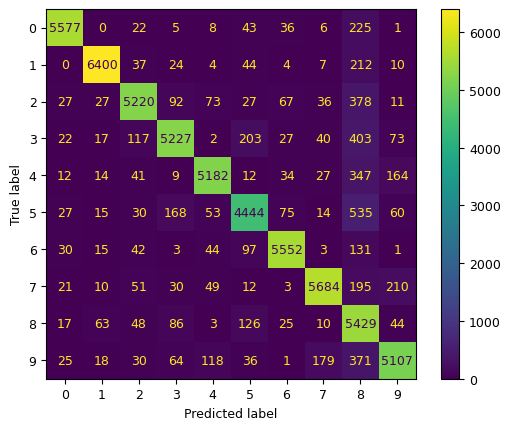

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

**How to read it?**

- Most values on **main diagonal** → model is good.
- If some cells on diagonal are **lighter** → model struggles with that class.

Example:
Digit "5" diagonal cell looks darker → maybe:

- Model makes more mistakes on "5", or
- There are fewer "5"s in dataset.

**Som We will Normalize the confusion matrix → Easier to read %**

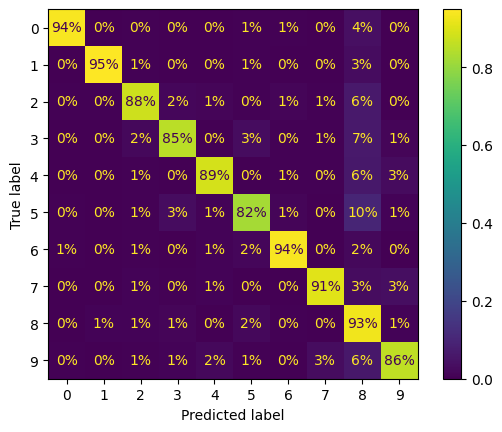

In [78]:
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

Now you can see:

- Only 82% of "5"s were classified correctly.
- 10% of "5"s were classified as "8"s → most common mistake.
- Only 2% of "8"s were classified as "5"s → confusion matrix is not symmetrical!

**Highlight only the mistakes (make errors stand out)**

    Remove the correct predictions by using sample_weight

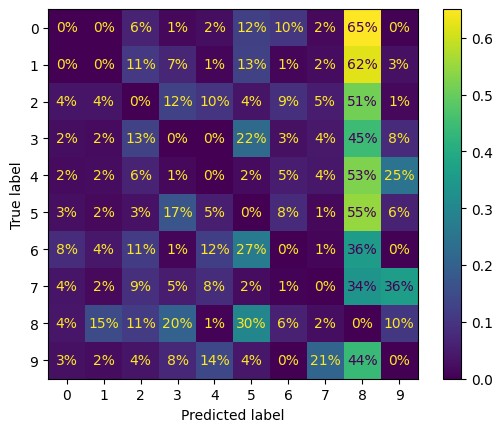

In [79]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

Why do this?
- Helps you spot which classes are most confused with each other.
- In this example, many digits are misclassified as "8" → this pattern becomes easier to see.

How to read percentages

Be careful:

- 36% in row 7, column 9 does not mean that 36% of "7"s were misclassified as "9"s.
- It means 36% of the errors on 7s were "7 → 9" errors.
- In reality, only 3% of all 7s were misclassified as "9" → as seen in the original normalized matrix.
  
Because it's the **percent of errors**, not percent of all data.

In summery

- Confusion matrix helps you see where the model makes mistakes.
- Normalize to get percentages — makes patterns easier to spot.
- Filter out correct predictions to focus on errors.

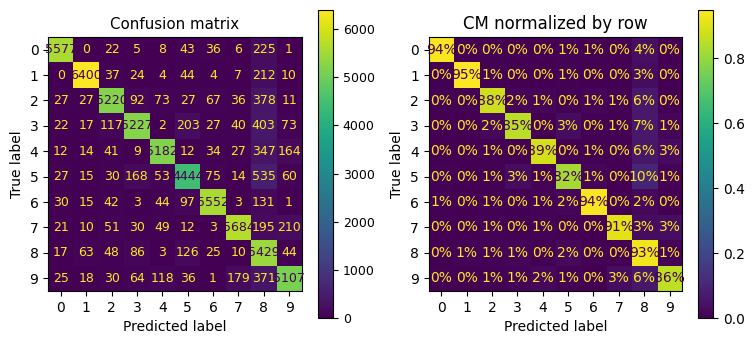

In [80]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()

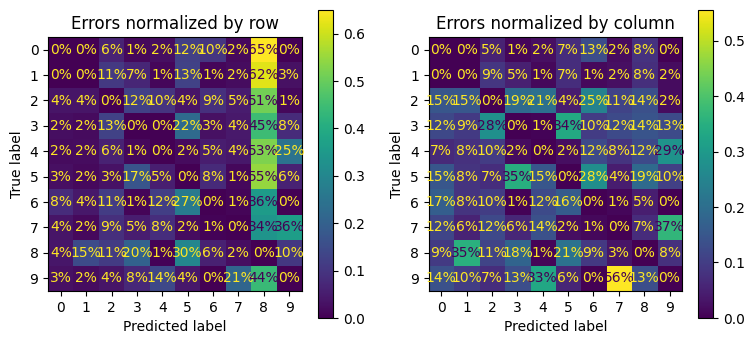

In [81]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()
plt.rc('font', size=14)

**Plot images to inspect where the model struggles**

In [82]:
cl_a, cl_b = '3', '5'

# Correctly classified 3s
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]

# 3s misclassified as 5s
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]

# 5s misclassified as 3s
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]

# Correctly classified 5s
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

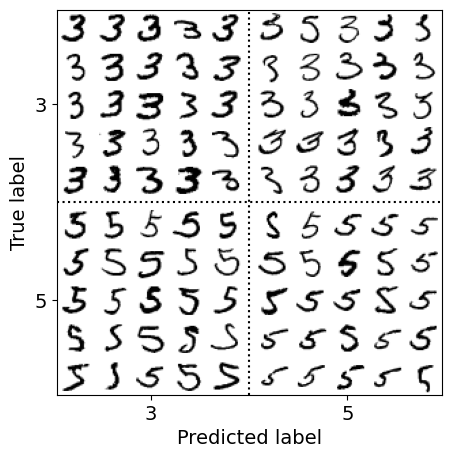

In [83]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

    So, Always do error analysis before tuning hyperparameters

# Multilabel Classification
- Most classifiers output one label per instance (single-label classification).
- In multilabel classification, each instance can have multiple labels — multiple "yes/no" answers.

    Ex, Face recognition :  show a picture → The output is [False, True, False].

In [89]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7') # (7, 8, or 9)
y_train_odd = (y_train.astype('int8') % 2 == 1) # not odd
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [91]:
knn_clf.predict([some_digit]) # not large, odd  --> [False,  True]

array([[False,  True]])

**How to Evaluate?** depends on your project

    Here we are using F1-score per label, then average (or any other binary classifier metric)

In [96]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [97]:
# Macro average (equal weight per label)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [98]:
# Weighted average (weighted by label frequency) shows that we get a negligible performance improvement when we set average="weighted" because the classes are already pretty well balanced.
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

**What If Your Classifier Doesn't Support Multilabel?**

Example: SVC (Support Vector Classifier) — does not support multilabel natively.

Solution 1 — One model per label:

    Train one binary classifier per label.

    Simple but can’t model label dependencies.

Solution 2 — Classifier Chain:

ClassifierChain trains the models in a chain:

    Model 1 → predicts label 1.

    Model 2 → uses features + label 1 to predict label 2.

    And so on…

    ClassifierChain

In [99]:
from sklearn.multioutput import ClassifierChain
from sklearn.svm import SVC

# Create the chain
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)

chain_clf.fit(X_train[:2000], y_multilabel[:2000])
chain_clf.predict([some_digit])

array([[0., 1.]])

**Real life Examples for multilabel classification:**
| Use Case         | Example                  |
| ---------------- | ------------------------ |
| Face recognition | One label per person     |
| Movie tags       | Comedy, Drama, Action    |
| News articles    | Politics, Health, Sports |


**Steps:**

1- Define your multilabel targets
    
Example: `y_multilabel = np.c_[label1, label2, ..., labelN]`

2- Choose a suitable classifier:

Simple: `KNeighborsClassifier` → works out of the box.

Advanced: `ClassifierChain(SVC)` → models label dependencies.

3- Train and evaluate:

Use `cross_val_predict` for reliable metrics.

Use `f1_score` (macro or weighted).

-----------------

- If your problem has many labels → consider also **neural networks** — they handle multilabel naturally with a sigmoid output layer.

# Multioutput Classification

**Multilabel classification** → each instance can have multiple labels → but each label is binary (yes/no).

**Multioutput classification** → each instance has multiple labels → but now, each label can have multiple values.

    Each label is multiclass!

**Examples:**
| Concept    | In this example                                         |
| ---------- | ------------------------------------------------------- |
| Instance   | One noisy image (shape: 784 pixels)                     |
| Labels     | 784 outputs → one per pixel                             |
| Label type | Each pixel has 256 possible values (0–255) → multiclass |


In [102]:
np.random.seed(42)

# Add noise to training set
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

# Add noise to test set
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

# Targets = original (clean) images
y_train_mod = X_train
y_test_mod = X_test

| Variable          | Meaning                         |
| ----------------- | ------------------------------- |
| **X\_train\_mod** | Noisy training images           |
| **y\_train\_mod** | Clean training images (targets) |
| **X\_test\_mod**  | Noisy test images               |
| **y\_test\_mod**  | Clean test images (targets)     |


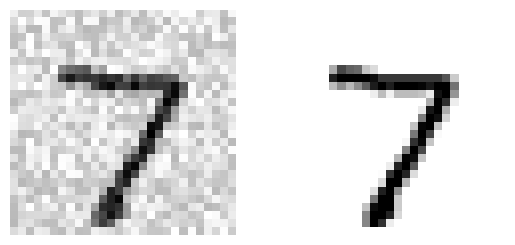

In [104]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

    Left: Noisy image (input)

    Right: Clean image (target)

In [107]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

**What is the model learning?**

    Input: noisy image → 784 pixel values

    Output: clean image → 784 pixel values (one per pixel)

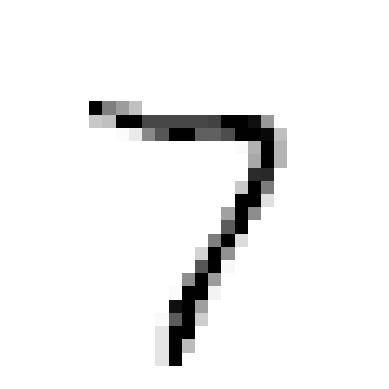

In [109]:
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()

    The model predicts a clean image based on the noisy test image

This Problem is a 

Multioutput–multiclass **classification**:

    One instance → 784 labels (pixels).

    Each label can take 256 possible values (0–255).

BUT:
More naturally treated as **regression** → since pixel intensity is numeric.

`KNeighborsRegressor` would give smoother results.